## Data source
https://www.kaggle.com/datasets/vedaangchopra/twitter-us-airline-sentiment-dataset

In [31]:
import numpy as np
import pandas as pd
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.io as pio
pio.templates.default = "ggplot2"

In [2]:
df = pd.read_csv("tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [5]:
df01 = df.loc[:, ~df.columns.isin(["tweet_coord", "airline_sentiment_gold", "negativereason_gold"])]
df01

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


### Remove duplicates

In [6]:
duplicate = df01[df01.duplicated(keep=False)]
duplicate.sort_values("tweet_id", inplace = True)
duplicate

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
12031,569621879633391616,negative,1.0,Customer Service Issue,1.0,American,salitron78,0,@AmericanAir no response to DM or email yet. ...,2015-02-22 14:16:53 -0800,on @TheJR,Seoul
14392,569621879633391616,negative,1.0,Customer Service Issue,1.0,American,salitron78,0,@AmericanAir no response to DM or email yet. ...,2015-02-22 14:16:53 -0800,on @TheJR,Seoul
13864,569699455919726593,negative,1.0,Customer Service Issue,1.0,American,JanssenMA,0,@AmericanAir @SouljaCoy what is AA going to do...,2015-02-22 19:25:09 -0800,NaN,NaN
12028,569699455919726593,negative,1.0,Customer Service Issue,1.0,American,JanssenMA,0,@AmericanAir @SouljaCoy what is AA going to do...,2015-02-22 19:25:09 -0800,NaN,NaN
12024,570264948548313088,positive,1.0,NaN,NaN,American,Runts54,0,@AmericanAir @dfwairport you 2 together are th...,2015-02-24 08:52:13 -0800,"Euless, Texas",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12063,570303383782989824,neutral,1.0,NaN,NaN,American,trentgillaspie,0,.@AmericanAir just disappointed with the Fligh...,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
11898,570305051819941889,neutral,1.0,NaN,NaN,American,Chandrafaythe,0,@AmericanAir my flight got Cancelled Flightled...,2015-02-24 11:31:34 -0800,NaN,Quito
12059,570305051819941889,neutral,1.0,NaN,NaN,American,Chandrafaythe,0,@AmericanAir my flight got Cancelled Flightled...,2015-02-24 11:31:34 -0800,NaN,Quito
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,SweeLoTmac,0,@AmericanAir why would I even consider continu...,2015-02-24 11:44:31 -0800,NaN,Quito


In [7]:
df01.drop_duplicates(keep='first',inplace=True)

### Data type conversion

In [8]:
df01['tweet_created'] = pd.to_datetime(df01['tweet_created'])

In [9]:
df01['tweet_id'] = df01['tweet_id'].astype("string")

### Tweet posted time distribution

In [10]:
byHour = df01.groupby([df01['tweet_created'].dt.hour])["tweet_id"].count()
byHour = byHour.reset_index()
byHour

,tweet_created,tweet_id
0,0,131
1,1,111
2,2,174
3,3,225
4,4,368
5,5,477
6,6,621
7,7,776
8,8,925
9,9,999


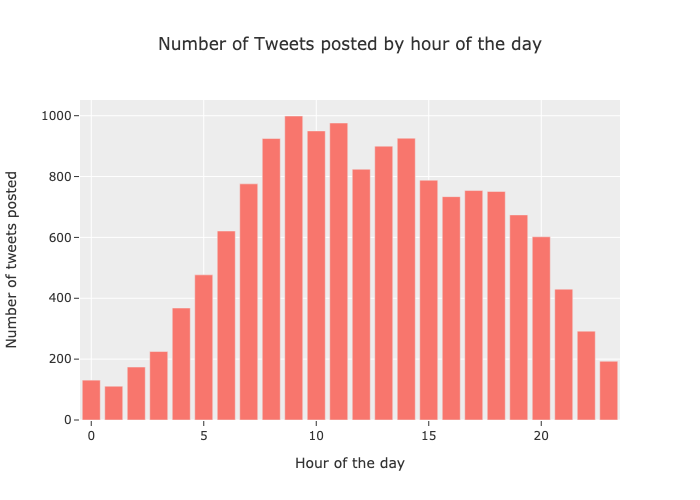

In [32]:
fig = px.bar(byHour, x='tweet_created', y='tweet_id',
             labels={'tweet_created':'Hour of the day', 'tweet_id':'Number of tweets posted'}, 
             title='Number of Tweets posted by hour of the day', height=500)
fig.show()
fig.show(renderer="png")
#fig.write_html("visuals/byHr_speed-bar.html")

In [12]:
timezone = df01.groupby(["user_timezone"])["tweet_id"].count().reset_index()
timezone

,user_timezone,tweet_id
0,Abu Dhabi,23
1,Adelaide,7
2,Alaska,108
3,America/Atikokan,1
4,America/Boise,3
...,...,...
80,Tokyo,1
81,Vienna,3
82,Warsaw,1
83,Wellington,1


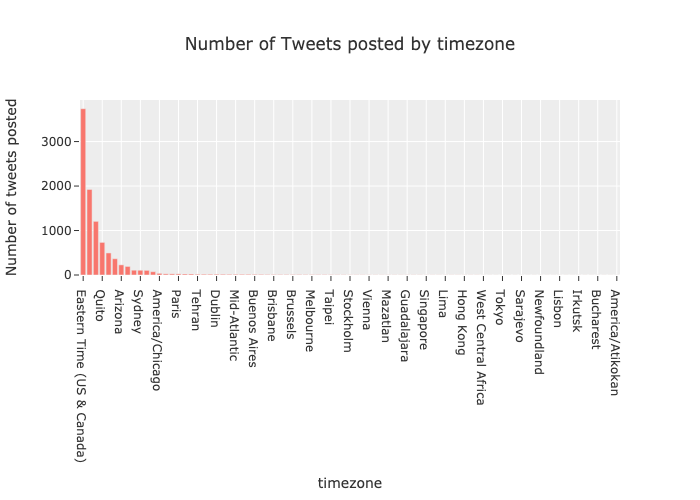

In [42]:
fig = px.bar(timezone, x='user_timezone', y='tweet_id',
             labels={'user_timezone':'timezone', 'tweet_id':'Number of tweets posted'}, 
             title='Number of Tweets posted by timezone', height=500)\
            .update_xaxes(categoryorder='total descending')
fig.show()
fig.show(renderer="png")
#fig.write_html("visuals/byHr_speed-bar.html")

In [14]:
airline = df01.groupby(["airline", "airline_sentiment"])["tweet_id"].count().reset_index()
airline

,airline,airline_sentiment,tweet_id
0,American,negative,1939
1,American,neutral,455
2,American,positive,326
3,Delta,negative,955
4,Delta,neutral,723
5,Delta,positive,544
6,Southwest,negative,1186
7,Southwest,neutral,664
8,Southwest,positive,570
9,US Airways,negative,2263


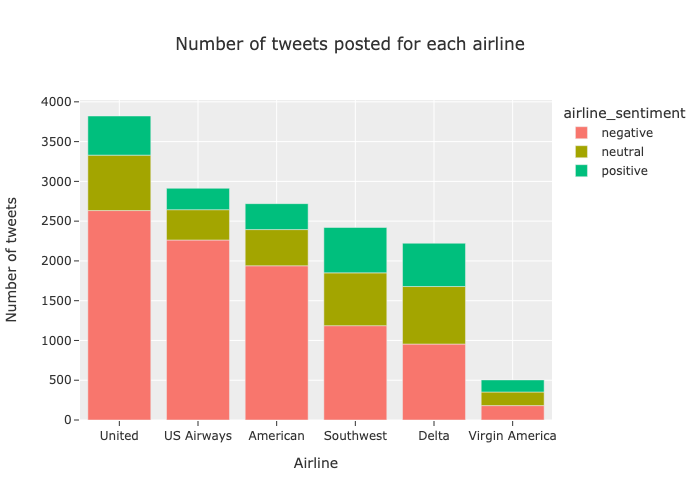

In [41]:
fig = px.bar(airline, x='airline', y='tweet_id',
             color = 'airline_sentiment',
             labels={'airline':'Airline', 'tweet_id':'Number of tweets'}, 
             title='Number of tweets posted for each airline', height=500)\
            .update_xaxes(categoryorder='total descending')
fig.show()
fig.show(renderer="png")
#fig.write_html("visuals/byHr_speed-bar.html")

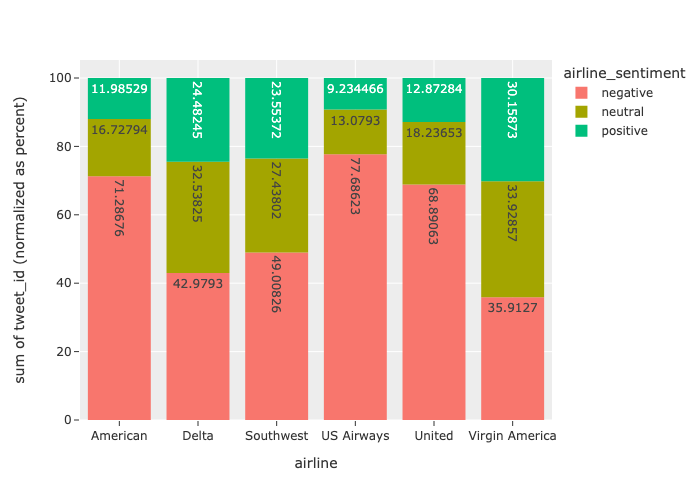

In [35]:
fig = px.histogram (airline, x="airline", color="airline_sentiment", y='tweet_id', 
                    barnorm = "percent", text_auto= True)

fig.show()
fig.show(renderer="png")

In [22]:
reason = df01.groupby(["airline", "negativereason"])["tweet_id"].count().reset_index()
reason

,airline,negativereason,tweet_id
0,American,Bad Flight,87
1,American,Can't Tell,198
2,American,Cancelled Flight,242
3,American,Customer Service Issue,760
4,American,Damaged Luggage,12
5,American,Flight Attendant Complaints,86
6,American,Flight Booking Problems,130
7,American,Late Flight,244
8,American,Lost Luggage,146
9,American,longlines,34


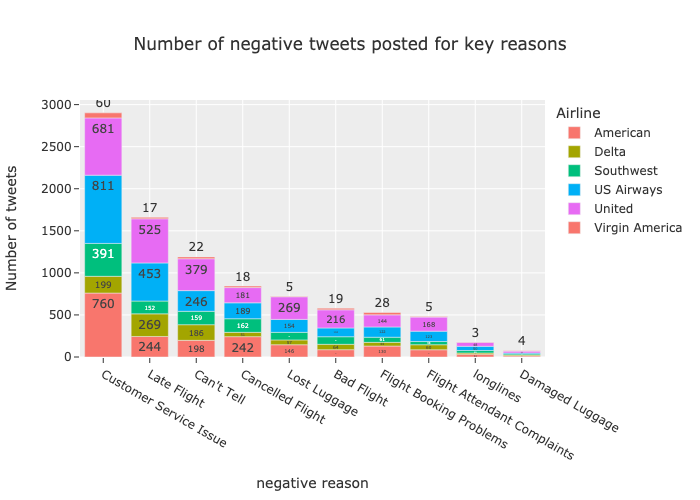

In [44]:
fig = px.bar(reason, x='negativereason', y='tweet_id',
             color = 'airline',
             labels={'airline':'Airline', 'tweet_id':'Number of tweets', 'negativereason':'negative reason'}, 
             title='Number of negative tweets posted for key reasons', text_auto= True)\
            .update_xaxes(categoryorder='total descending')
fig.show()
fig.show(renderer="png")
#fig.write_html("visuals/byHr_speed-bar.html")

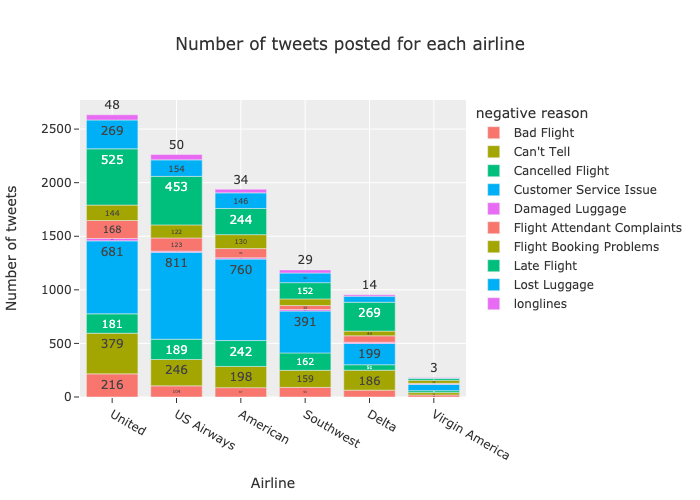

In [45]:
fig = px.bar(reason, x='airline', y='tweet_id',
             color = 'negativereason',
             labels={'airline':'Airline', 'tweet_id':'Number of tweets', 'negativereason':'negative reason'}, 
             title='Number of tweets posted for each airline', text_auto= True)\
            .update_xaxes(categoryorder='total descending')
fig.show()
fig.show(renderer="png")
#fig.write_html("visuals/byHr_speed-bar.html")

In [47]:
byDate = df01.groupby([df01['tweet_created'].dt.date, 'airline', 'negativereason'])["tweet_id"].count().reset_index()
byDate

,tweet_created,airline,negativereason,tweet_id
0,2015-02-16,Delta,Can't Tell,1
1,2015-02-16,United,Late Flight,2
2,2015-02-17,Delta,Bad Flight,6
3,2015-02-17,Delta,Can't Tell,21
4,2015-02-17,Delta,Cancelled Flight,8
...,...,...,...,...
389,2015-02-24,United,longlines,2
390,2015-02-24,Virgin America,Bad Flight,3
391,2015-02-24,Virgin America,Can't Tell,4
392,2015-02-24,Virgin America,Customer Service Issue,2


In [55]:
byDate_airline = byDate.groupby(["tweet_created", "airline"])["tweet_id"].sum().reset_index()
byDate_airline

,tweet_created,airline,tweet_id
0,2015-02-16,Delta,1
1,2015-02-16,United,2
2,2015-02-17,Delta,108
3,2015-02-17,Southwest,213
4,2015-02-17,US Airways,233
5,2015-02-17,United,272
6,2015-02-17,Virgin America,12
7,2015-02-18,American,1
8,2015-02-18,Delta,105
9,2015-02-18,Southwest,110


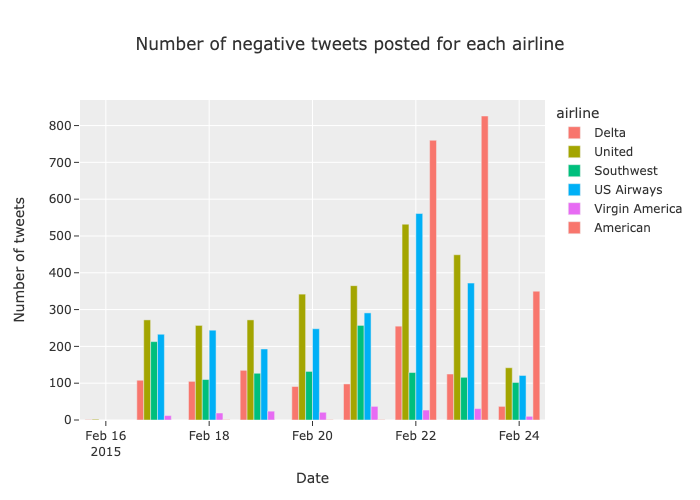

In [57]:
fig = px.bar(byDate_airline, x='tweet_created', y='tweet_id',
             color = 'airline',
             labels={'tweet_created':'Date', 'tweet_id':'Number of tweets'}, 
             title='Number of negative tweets posted for each airline', barmode='group')
fig.show()
fig.show(renderer="png")
#fig.write_html("visuals/byHr_speed-bar.html")

In [58]:
byDate_reason = byDate.groupby(["tweet_created", "negativereason"])["tweet_id"].sum().reset_index()
byDate_reason

,tweet_created,negativereason,tweet_id
0,2015-02-16,Can't Tell,1
1,2015-02-16,Late Flight,2
2,2015-02-17,Bad Flight,52
3,2015-02-17,Can't Tell,97
4,2015-02-17,Cancelled Flight,93
...,...,...,...
77,2015-02-24,Flight Attendant Complaints,50
78,2015-02-24,Flight Booking Problems,57
79,2015-02-24,Late Flight,97
80,2015-02-24,Lost Luggage,67


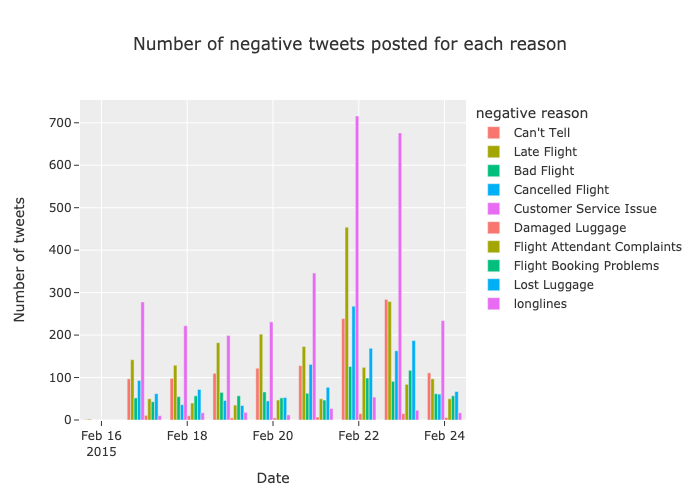

In [60]:
fig = px.bar(byDate_reason, x='tweet_created', y='tweet_id',
             color = 'negativereason',
             labels={'tweet_created':'Date', 'tweet_id':'Number of tweets', 'negativereason':'negative reason'}, 
             title='Number of negative tweets posted for each reason', barmode='group')
fig.show()
fig.show(renderer="png")
#fig.write_html("visuals/byHr_speed-bar.html")